In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import rfe
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\maild\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
telecom_df = pd.read_csv(r'C:\Users\maild\Downloads\telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
## below we create a variable that will average the average revenue per customer based on June and July months
telecom_df['Jun-Jul_Avg-ARPU'] = (telecom_df['arpu_6'] + telecom_df['arpu_7'])/2

In [5]:
## we just have a look at the 70th percentile value for all curtomers' average ARPU for June and July
np.percentile(telecom_df['Jun-Jul_Avg-ARPU'],q=70)

317.30929999999984

In [6]:

telecom_df['Jun-Jul_Avg-ARPU'].describe()

count    99999.000000
mean       280.762003
std        310.178292
min       -749.783000
25%        102.992250
50%        198.732500
75%        359.518500
max      31438.461000
Name: Jun-Jul_Avg-ARPU, dtype: float64

In [7]:
## below we retain only high value customers average recharge amount is greater than the 70th percentile

telecom_df = telecom_df[telecom_df['Jun-Jul_Avg-ARPU']>np.percentile(telecom_df['Jun-Jul_Avg-ARPU'],q=70)]

In [8]:
telecom_df.shape

(30000, 227)

In [9]:
## now we create conditions for identifying high value customers who have churned

condition_one = (telecom_df["total_ic_mou_9"] == 0) & (telecom_df["total_og_mou_9"] == 0) & (telecom_df["vol_2g_mb_9"] == 0) & (telecom_df["vol_3g_mb_9"] == 0)
condition_two = (telecom_df["total_ic_mou_9"] == 1) | (telecom_df["total_og_mou_9"] == 1) | (telecom_df["vol_2g_mb_9"] == 1) | (telecom_df["vol_3g_mb_9"] == 1)

conditions = [condition_one,condition_two]
condition_results = [1,0]

telecom_df['churn'] = np.select(conditions,condition_results)

In [10]:
telecom_df[['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
7,7000701601,0.00,0.00,0.00,0.00,1
8,7001524846,34.91,142.18,0.00,0.00,0
13,7002191713,631.86,446.09,0.00,0.00,0
16,7000875565,334.56,255.74,0.00,0.00,0
17,7000187447,87.13,631.08,0.00,0.00,0
20,7001028254,240.93,293.83,0.00,0.00,0
21,7002124215,252.61,1031.53,0.00,0.00,0
24,7001125315,330.03,627.78,0.00,0.00,0
33,7000149764,114.16,1.70,30.92,5588.11,0
38,7000815202,114.09,708.04,0.00,0.00,0


In [11]:
telecom_df['churn'].value_counts(normalize=True)

0    0.9116
1    0.0884
Name: churn, dtype: float64

In [12]:
## now we will delete all columns associated with September columns


Sep_cols = []

for i in telecom_df.columns:
    if i[-1] == '9':
        Sep_cols.append(i)
        
        
telecom_df.drop(Sep_cols,inplace=True,axis=1)
telecom_df.shape

(30000, 174)

In [13]:
##  we will have a look at the columns with most null values 

telecom_df.isnull().sum().sort_values(ascending=False).head(25)

night_pck_user_6            18453
fb_user_6                   18453
count_rech_2g_6             18453
count_rech_3g_6             18453
av_rech_amt_data_6          18453
total_rech_data_6           18453
date_of_last_rech_data_6    18453
arpu_3g_6                   18453
arpu_2g_6                   18453
max_rech_data_6             18453
arpu_3g_7                   18221
count_rech_3g_7             18221
total_rech_data_7           18221
night_pck_user_7            18221
date_of_last_rech_data_7    18221
fb_user_7                   18221
av_rech_amt_data_7          18221
count_rech_2g_7             18221
max_rech_data_7             18221
arpu_2g_7                   18221
count_rech_3g_8             18104
count_rech_2g_8             18104
av_rech_amt_data_8          18104
date_of_last_rech_data_8    18104
fb_user_8                   18104
dtype: int64

In [14]:
##  below we shortlist all columns that have more than 30% null values


telecom_df.columns[(telecom_df.isnull().sum() /telecom_df.shape[0]*100) >30]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [15]:
##  then we assign them to a list named 'missing_val_cols'

missing_val_cols = telecom_df.columns[(telecom_df.isnull().sum() /telecom_df.shape[0]*100) > 30]

In [16]:
##  then we drop the list of columns from the telecom_df dataframe


telecom_df.drop(missing_val_cols,axis=1,inplace=True)

In [17]:
telecom_df.shape

(30000, 144)

In [18]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Jun-Jul_Avg-ARPU,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,0,0,0,667,0.00,0.00,0.00,0.0,354.4940,0


We will drop the below variables as we believe the dates are not of any importance as we already have all the variables split acros different months columns (ex: arpu_6,arpu_7.arpu_8) 

**'last_date_of_month_6'**, **'last_date_of_month_7'**, **'last_date_of_month_8'**, **'date_of_last_rech_data_6'**, **'date_of_last_rech_data_7'**, **'date_of_last_rech_data_8'**

In [19]:
telecom_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
telecom_df.shape

(30000, 138)

In [20]:
telecom_df['circle_id'].nunique()

1

In [21]:
## we drop the  'mobile_number' as we cant use it for our analysis
## we also drop 'circle_id' as it has only one unique value as can be seen in the above line
 
telecom_df.drop(['mobile_number','circle_id'],inplace=True,axis=1)

In [22]:
## we believe that loc_ic_t2f, loc_ic_t2m and loc_ic_t2t adds upto the loc_ic_mou variable.
## we verify this by creating calculated columns for each month's loc_ic_mou variable and then we compare them

telecom_df['Incoming_calc_6'] =  (telecom_df['loc_ic_t2f_mou_6'] + telecom_df['loc_ic_t2m_mou_6'] + telecom_df['loc_ic_t2t_mou_6'])
telecom_df['Incoming_calc_7'] =  (telecom_df['loc_ic_t2f_mou_7'] + telecom_df['loc_ic_t2m_mou_7'] + telecom_df['loc_ic_t2t_mou_7'])
telecom_df['Incoming_calc_8'] =  (telecom_df['loc_ic_t2f_mou_8'] + telecom_df['loc_ic_t2m_mou_8'] + telecom_df['loc_ic_t2t_mou_8'])

telecom_df[['Incoming_calc_6','loc_ic_mou_6','Incoming_calc_7','loc_ic_mou_7','Incoming_calc_8','loc_ic_mou_8']]

,Incoming_calc_6,loc_ic_mou_6,Incoming_calc_7,loc_ic_mou_7,Incoming_calc_8,loc_ic_mou_8
7,427.86,427.88,355.21,355.23,188.03,188.04
8,81.42,81.43,23.82,23.83,15.79,15.79
13,215.57,215.58,26.11,26.11,255.25,255.26
16,276.85,276.86,229.81,229.83,211.76,211.78
17,81.95,81.96,2.31,2.31,0.00,0.00
...,...,...,...,...,...,...
99974,100.44,100.44,91.30,91.31,47.70,47.71
99981,378.99,378.99,337.26,337.28,402.56,402.58
99986,566.25,566.26,618.06,618.08,635.83,635.84
99988,307.30,307.31,288.75,288.76,1144.64,1144.64


In [23]:
## our assumption came true as per the above table. Hence we will drop the below variables to reduce the number of columns and to avoid multi collinearity


telecom_df.drop(['Incoming_calc_6', 'Incoming_calc_7', 'Incoming_calc_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2t_mou_7',  'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8'], axis = 1, inplace=True)
telecom_df.shape

(30000, 127)

In [24]:
## we believe that loc_og_t2f, loc_og_t2m and loc_og_t2t adds upto the loc_og_mou variable.
## we verify this by creating calculated columns for each month's loc_og_mou variable and then we compare them

telecom_df['Outgoing_calc_6'] =  (telecom_df['loc_og_t2f_mou_6'] + telecom_df['loc_og_t2m_mou_6'] + telecom_df['loc_og_t2t_mou_6'])
telecom_df['Outgoing_calc_7'] =  (telecom_df['loc_og_t2f_mou_7'] + telecom_df['loc_og_t2m_mou_7'] + telecom_df['loc_og_t2t_mou_7'])
telecom_df['Outgoing_calc_8'] =  (telecom_df['loc_og_t2f_mou_8'] + telecom_df['loc_og_t2m_mou_8'] + telecom_df['loc_og_t2t_mou_8'])

telecom_df[['Outgoing_calc_6','loc_og_mou_6','Outgoing_calc_7','loc_og_mou_7','Outgoing_calc_8','loc_og_mou_8']]

,Outgoing_calc_6,loc_og_mou_6,Outgoing_calc_7,loc_og_mou_7,Outgoing_calc_8,loc_og_mou_8
7,422.15,422.16,533.90,533.91,255.79,255.79
8,378.09,378.09,288.17,288.18,63.03,63.04
13,205.30,205.31,53.47,53.48,353.98,353.99
16,315.90,315.91,215.63,215.64,205.92,205.93
17,97.53,97.54,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
99974,415.90,415.91,348.49,348.49,354.91,354.91
99981,124.74,124.74,49.93,49.94,150.58,150.59
99986,1300.42,1300.43,1062.46,1062.48,1225.05,1225.06
99988,308.11,308.11,295.26,295.26,130.47,130.48


In [25]:
## our assumption came true as per the above table. Hence we will drop the below variables to reduce the number of columns and to avoid multi collinearity

telecom_df.drop(['Outgoing_calc_6', 'Outgoing_calc_7', 'Outgoing_calc_8', 'loc_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_7',  'loc_og_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2t_mou_8'], axis = 1, inplace=True)
telecom_df.shape

(30000, 118)

In [26]:
## we believe that std_og_t2c, std_og_t2f, std_og_t2m and std_og_t2t adds upto the std_og_mou variable.
## we verify this by creating calculated columns for each month's std_og_mou variable and then we compare them

telecom_df['STD_Outgoing_calc_6'] =  telecom_df['std_og_t2c_mou_6'] + telecom_df['std_og_t2f_mou_6'] + telecom_df['std_og_t2m_mou_6'] + telecom_df['std_og_t2t_mou_6']
telecom_df['STD_Outgoing_calc_7'] =  telecom_df['std_og_t2c_mou_7'] + telecom_df['std_og_t2f_mou_7'] + telecom_df['std_og_t2m_mou_7'] + telecom_df['std_og_t2t_mou_7']
telecom_df['STD_Outgoing_calc_8'] =  telecom_df['std_og_t2c_mou_8'] + telecom_df['std_og_t2f_mou_8'] + telecom_df['std_og_t2m_mou_8'] + telecom_df['std_og_t2t_mou_8']

telecom_df[['STD_Outgoing_calc_6','std_og_mou_6','STD_Outgoing_calc_7','std_og_mou_7','STD_Outgoing_calc_8','std_og_mou_8']]

,STD_Outgoing_calc_6,std_og_mou_6,STD_Outgoing_calc_7,std_og_mou_7,STD_Outgoing_calc_8,std_og_mou_8
7,60.85,60.86,75.13,75.14,77.83,77.84
8,130.25,130.26,143.47,143.48,98.27,98.28
13,701.77,701.78,138.92,138.93,655.17,655.18
16,30.88,30.89,67.09,67.09,21.52,21.53
17,1148.46,1148.46,0.81,0.81,0.00,0.00
...,...,...,...,...,...,...
99974,30.05,30.06,17.34,17.34,6.18,6.18
99981,6.15,6.15,0.00,0.00,14.01,14.01
99986,284.39,284.39,104.00,104.01,145.78,145.79
99988,67.65,67.66,156.21,156.21,120.29,120.29


In [27]:
## our assumption came true as per the above table. Hence we will drop the below variables to reduce the number of columns and to avoid multi collinearity

telecom_df.drop(['STD_Outgoing_calc_6', 'STD_Outgoing_calc_7', 'STD_Outgoing_calc_8', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2c_mou_7', 'std_og_t2f_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_7', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8'], axis = 1, inplace=True)
telecom_df.shape

(30000, 106)

In [28]:
## we believe that std_ic_t2o, std_ic_t2f, std_ic_t2m and std_ic_t2t adds upto the std_ic_mou variable.
## we verify this by creating calculated columns for each month's std_ic_mou variable and then we compare them


telecom_df['STD_Incoming_calc_6'] =  telecom_df['std_ic_t2o_mou_6'] + telecom_df['std_ic_t2f_mou_6'] + telecom_df['std_ic_t2m_mou_6'] + telecom_df['std_ic_t2t_mou_6']
telecom_df['STD_Incoming_calc_7'] =  telecom_df['std_ic_t2o_mou_7'] + telecom_df['std_ic_t2f_mou_7'] + telecom_df['std_ic_t2m_mou_7'] + telecom_df['std_ic_t2t_mou_7']
telecom_df['STD_Incoming_calc_8'] =  telecom_df['std_ic_t2o_mou_8'] + telecom_df['std_ic_t2f_mou_8'] + telecom_df['std_ic_t2m_mou_8'] + telecom_df['std_ic_t2t_mou_8']

telecom_df[['STD_Incoming_calc_6','std_ic_mou_6','STD_Incoming_calc_7','std_ic_mou_7','STD_Incoming_calc_8','std_ic_mou_8']]

,STD_Incoming_calc_6,std_ic_mou_6,STD_Incoming_calc_7,std_ic_mou_7,STD_Incoming_calc_8,std_ic_mou_8
7,180.52,180.54,173.06,173.08,193.93,193.94
8,22.43,22.43,4.66,4.66,0.75,0.75
13,423.81,423.81,68.08,68.09,474.40,474.41
16,87.98,87.99,151.72,151.73,82.44,82.44
17,9.91,9.91,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
99974,17.36,17.36,6.61,6.61,5.41,5.41
99981,99.19,99.19,7.42,7.43,17.36,17.36
99986,14.45,14.46,3.76,3.76,24.16,24.16
99988,691.43,691.44,86.20,86.21,88.85,88.86


In [29]:
## our assumption came true as per the above table. Hence we will drop the below variables to reduce the number of columns and to avoid multi collinearity

telecom_df.drop(['STD_Incoming_calc_6', 'STD_Incoming_calc_7', 'STD_Incoming_calc_8', 'std_ic_t2o_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8'], axis = 1, inplace=True)
telecom_df.shape

(30000, 94)

In [30]:
## We will also drop the 'Jun-Jul_Avg-ARPU' variable as it has served its purpose of identifying the high churn customers and we no longer need it

telecom_df.drop(['Jun-Jul_Avg-ARPU'], axis=1, inplace=True)
telecom_df.shape

(30000, 93)

In [31]:
## We will just find which are the columns that have just one unique values

telecom_df.nunique().sort_values(ascending=True).head(10)

loc_og_t2o_mou     1
std_og_t2o_mou     1
loc_ic_t2o_mou     1
churn              2
monthly_2g_6       5
monthly_2g_8       6
monthly_2g_7       6
monthly_3g_8      12
monthly_3g_6      12
monthly_3g_7      15
dtype: int64

In [32]:
## and we drop the below variables from our dataframe since they have only one unique values as could be seen above

telecom_df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace=True)
telecom_df.shape

(30000, 90)

In [34]:
## below we just create a new dataframe 'telecom_df_2' that would exclude the 'churn' column.
## we do this so that we could convert all 0s into null values without disturbing 'churn' columns. 
##  This will help us eliminate columns with high percentage of 0 and null values
telecom_df_2 = telecom_df.drop('churn', axis=1)
telecom_df_2.replace(0,np.nan, inplace=True)
telecom_df_2

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,NaN,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,NaN
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,NaN,...,NaN,NaN,NaN,NaN,NaN,315,21.03,910.65,122.16,NaN
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,NaN,NaN,NaN,NaN,NaN,2607,NaN,NaN,NaN,NaN
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,NaN,...,NaN,NaN,NaN,NaN,NaN,511,NaN,2.45,21.89,NaN
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,NaN,5.54,NaN,...,NaN,NaN,NaN,NaN,NaN,667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99974,414.303,321.093,371.016,17.56,NaN,1.30,428.41,366.78,360.58,NaN,...,NaN,NaN,NaN,NaN,NaN,3054,NaN,NaN,NaN,NaN
99981,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,NaN,...,1.0,1.0,NaN,NaN,NaN,473,1100.43,619.59,668.05,0.33
99986,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,NaN,...,NaN,NaN,NaN,NaN,NaN,2696,497.45,598.67,604.08,NaN
99988,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,NaN,...,NaN,NaN,NaN,NaN,NaN,328,104.73,NaN,NaN,NaN


In [35]:
## now we create a list of columns in the name 'missing_val_cols_2' that would have more than 30% of null values in the dataframe 

missing_val_cols_2 = telecom_df_2.columns[(telecom_df_2.isnull().sum() /telecom_df_2.shape[0]*100)>30]

In [36]:
## then we drop the list of columns assigned to 'missing_val_cols_2' from the dataframe


telecom_df_2.drop(missing_val_cols_2, axis=1, inplace=True)
telecom_df_2.shape

(30000, 40)

In [37]:
telecom_df_2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,422.16,...,1580.0,790.0,3638.0,1580.0,790.0,1580.0,NaN,NaN,779.0,802
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,378.09,...,437.0,601.0,120.0,90.0,154.0,30.0,50.0,NaN,10.0,315
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,205.31,...,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,NaN,2607
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,315.91,...,570.0,348.0,160.0,110.0,110.0,130.0,100.0,100.0,130.0,511
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,NaN,5.54,97.54,...,816.0,NaN,30.0,110.0,NaN,30.0,30.0,NaN,NaN,667


In [38]:
## now we create a list of columns in the name 'missing_val_cols_3' that have even a single null value in the dataframe


missing_val_cols_3 = telecom_df_2.columns[(telecom_df_2.isnull().sum() /telecom_df_2.shape[0]*100)>0]

In [39]:
## below we will replace all null values for each columns with 0

for i in missing_val_cols_3:
    telecom_df_2.replace(np.nan,0,inplace=True)
    
telecom_df_2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,422.16,...,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,802
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,378.09,...,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,315
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,205.31,...,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,2607
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,315.91,...,570.0,348.0,160.0,110.0,110.0,130.0,100.0,100.0,130.0,511
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,97.54,...,816.0,0.0,30.0,110.0,0.0,30.0,30.0,0.0,0.0,667


In [40]:
## now we will add back the all important 'churn' column
telecom_df_2['churn'] = telecom_df['churn']

In [41]:
## and rename our dataframe back to 'telecom_df' as our cleaning work is done here
telecom_df = telecom_df_2
telecom_df.shape

(30000, 41)

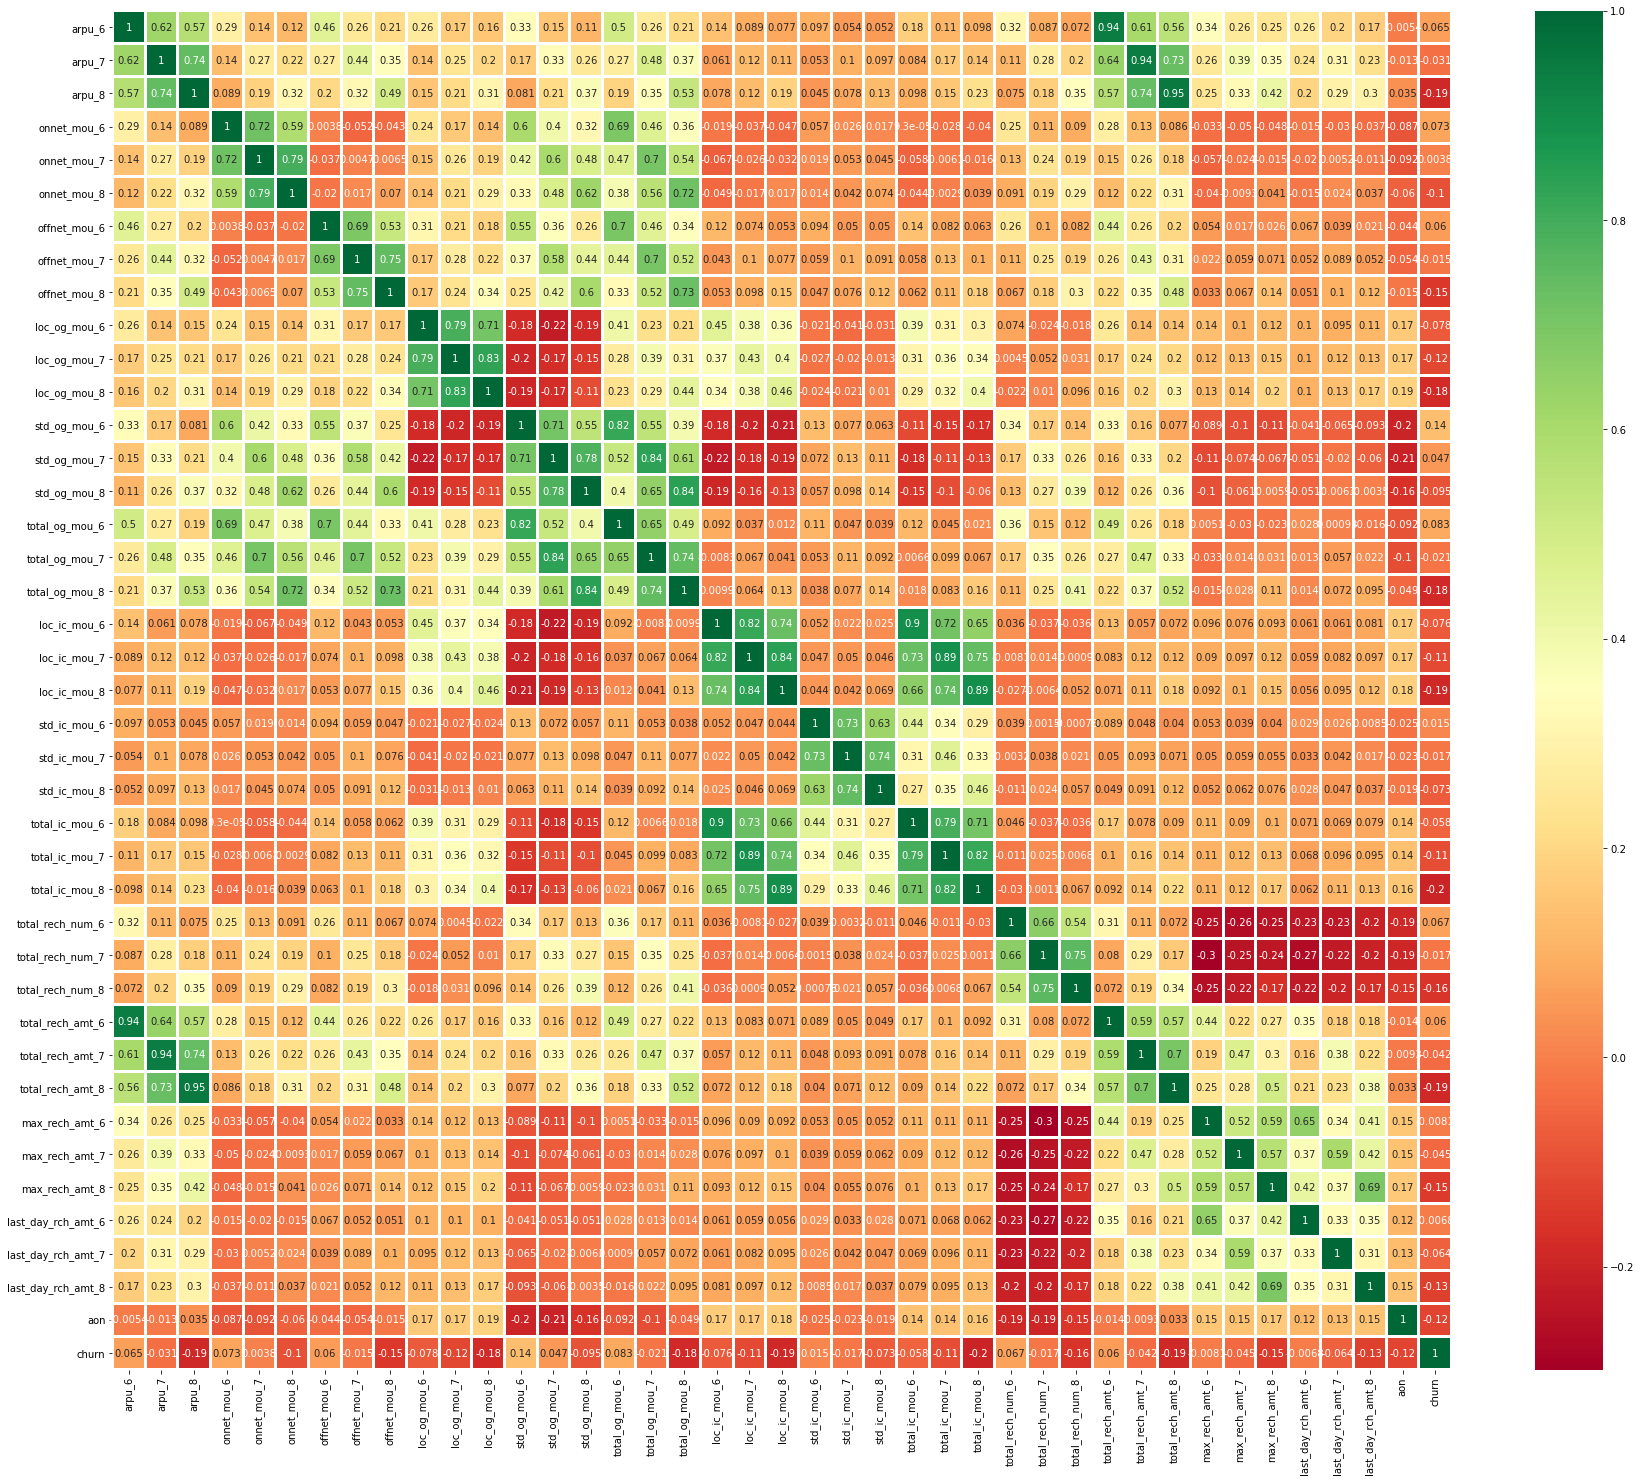

In [42]:
fig, ax = plt.subplots(figsize=(30,25))         # Size of the figure
sns.heatmap(telecom_df.corr(),annot = True, cmap='RdYlGn',linewidths=2, ax= ax)
plt.show()

In [43]:
## now we will begin building our logistic regression model

In [44]:
# we drop the 'churn' column for our X variables dataframe 


X = telecom_df.drop(['churn'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_mou_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,422.16,...,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,802
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,378.09,...,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,315
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,205.31,...,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,2607
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,315.91,...,570.0,348.0,160.0,110.0,110.0,130.0,100.0,100.0,130.0,511
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,97.54,...,816.0,0.0,30.0,110.0,0.0,30.0,30.0,0.0,0.0,667


In [45]:
# and we assign 'churn' to our y variable since this is our target variable

y = telecom_df['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [46]:
# we split our datasets into train and test datasets below

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [47]:
## we see a huge data imbalance in the y variable

print(y_train.value_counts())
print(y_test.value_counts())

0    19144
1     1856
Name: churn, dtype: int64
0    8204
1     796
Name: churn, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

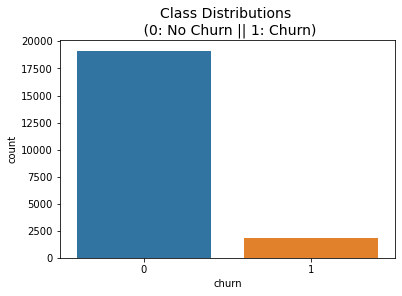

In [48]:
## this is best illustrated with help of the below bar chart for y_train dataset

sns.countplot(y_train)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

In [49]:
## we will fix this problem using Undersampling on train data

In [50]:
# Random Undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3712

In [51]:
from collections import Counter

print(sorted(Counter(y_resampled_us).items()))

[(0, 1856), (1, 1856)]


Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

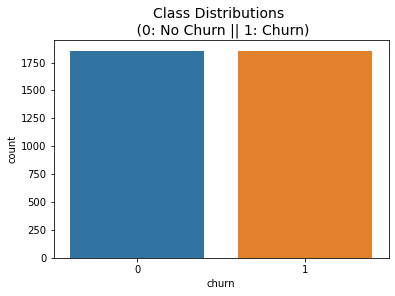

In [52]:
## with help of undersampler we have achieved data balance

sns.countplot(y_resampled_us)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

In [53]:

cols = X_resampled_us.columns

In [54]:
## we will scale all the columns using MinMaxScaler()

scaler = MinMaxScaler()

X_resampled_us[cols] = scaler.fit_transform(X_resampled_us[cols])


In [55]:
# We use RFE to find out the 15 best columns to include in our model

logreg = LogisticRegression()

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_resampled_us, y_resampled_us)

list(zip(X_resampled_us.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', False, 23),
 ('offnet_mou_6', False, 3),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 2),
 ('loc_og_mou_6', False, 26),
 ('loc_og_mou_7', False, 7),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 16),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', False, 13),
 ('total_og_mou_6', False, 12),
 ('total_og_mou_7', False, 14),
 ('total_og_mou_8', True, 1),
 ('loc_ic_mou_6', False, 20),
 ('loc_ic_mou_7', False, 15),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 19),
 ('std_ic_mou_7', False, 25),
 ('std_ic_mou_8', False, 11),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', False, 6),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_6', False, 24),
 ('total_rech_num_7', False, 18),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_7', False, 10),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', False, 8

In [56]:
## we will assign all the columns selected by RFE to 'cols' as we will keep deleting variables from this based on P values and VIFs

cols = X_resampled_us.columns[rfe.support_]

In [57]:
# below we will try to get the summary for the 1st version of our logistic regression model
X_train_sm = sm.add_constant(X_resampled_us[cols])
logm = sm.GLM(y_resampled_us,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3696
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1666.3
Date:                Mon, 31 May 2021   Deviance:                       3332.6
Time:                        16:19:03   Pearson chi2:                 3.77e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3501      0.153      2.288      0.022       0.050       0.650
arpu_6                 1.3254      3.261      0.406      0.684      -5.066       7.717
arpu_7                12.1358      2.541      4.776      0.000       7.156      17.116
arpu_8                 2.2131      2.957      0.748      0.454      -3.582       8.008
onnet_mou_6            4.4379      0.911      4.869      0.000       2.651       6.224
offnet_mou_7           4.0075      0.972      4.122      0.000       2.102       5.913
loc_og_mou_8         -12.4779      2.348     -5.313      0.000     -17.081      -7.875
std_og_mou_7           0.0296      1.252      0.024      0.981      -2.423       2.483
total_og_mou_8        -4.8620      0.959     -5.069      0.000      -6.742      -2.982
loc_ic_mou_8          -9.9777      2.541     -3.927      0.000     -14.958      -4.998
total_ic_mou_6         5.1427      0.962      5.343      0.000       3.256       7.029
total_ic_mou_8        -9.6231      2.025     -4.753      0.000     -13.591      -5.655
total_rech_num_8      -8.9618      1.459     -6.141      0.000     -11.822      -6.101
total_rech_amt_6       5.0370      2.863      1.759      0.079      -0.575      10.649
total_rech_amt_8      -9.1809      4.139     -2.218      0.027     -17.293      -1.069
last_day_rch_amt_8   -12.4565      2.155     -5.779      0.000     -16.681      -8.232
======================================================================================
"""

In [58]:
# and we run the Variance Inflation factor table to see which are the columns with highest multi collinearity and that should be deleted

vif = pd.DataFrame()
vif['Features'] = X_resampled_us[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_us[cols].values, i) for i in range(X_resampled_us[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_6,25.22
2,arpu_8,23.82
12,total_rech_amt_6,19.61
13,total_rech_amt_8,15.55
10,total_ic_mou_8,11.54
8,loc_ic_mou_8,10.16
6,std_og_mou_7,6.38
1,arpu_7,5.84
7,total_og_mou_8,5.69
4,offnet_mou_7,4.73


In [59]:
# since 'arpu_6' has the highest VIF we drop it from the list of columns for the model


cols = cols.drop(['arpu_6'],1)


In [60]:
# next we run the summary for the 2nd version of our logistic regression model

X_train_sm2 = sm.add_constant(X_resampled_us[cols])
logm2 = sm.GLM(y_resampled_us,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3697
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1666.4
Date:                Mon, 31 May 2021   Deviance:                       3332.8
Time:                        16:19:14   Pearson chi2:                 3.82e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3790      0.135      2.802      0.005       0.114       0.644
arpu_7                12.0765      2.536      4.762      0.000       7.106      17.047
arpu_8                 2.3988      2.920      0.821      0.411      -3.325       8.122
onnet_mou_6            4.4634      0.909      4.909      0.000       2.681       6.245
offnet_mou_7           4.0237      0.971      4.144      0.000       2.121       5.927
loc_og_mou_8         -12.5232      2.346     -5.337      0.000     -17.122      -7.924
std_og_mou_7           0.0078      1.250      0.006      0.995      -2.442       2.457
total_og_mou_8        -4.8643      0.959     -5.072      0.000      -6.744      -2.985
loc_ic_mou_8          -9.9875      2.539     -3.933      0.000     -14.965      -5.010
total_ic_mou_6         5.1623      0.961      5.371      0.000       3.278       7.046
total_ic_mou_8        -9.6329      2.023     -4.761      0.000     -13.599      -5.667
total_rech_num_8      -8.9941      1.458     -6.167      0.000     -11.852      -6.136
total_rech_amt_6       6.0336      1.474      4.092      0.000       3.144       8.924
total_rech_amt_8      -9.3447      4.121     -2.267      0.023     -17.422      -1.267
last_day_rch_amt_8   -12.5187      2.148     -5.828      0.000     -16.729      -8.309
======================================================================================
"""

In [61]:
# and the updated VIF table

vif = pd.DataFrame()
vif['Features'] = X_resampled_us[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_us[cols].values, i) for i in range(X_resampled_us[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,19.35
12,total_rech_amt_8,13.31
9,total_ic_mou_8,11.53
7,loc_ic_mou_8,10.16
5,std_og_mou_7,6.38
0,arpu_7,5.84
6,total_og_mou_8,5.67
3,offnet_mou_7,4.73
4,loc_og_mou_8,3.57
11,total_rech_amt_6,3.55


In [62]:
# since 'arpu_8' is a very important variable for us we will try not to drop it inspite of having the higest VIF.
# we will drop 'std_og_mou_7' instead which has the highest P value 

cols = cols.drop(['std_og_mou_7'],1)


In [63]:
# next we run the summary for the 3rd version of our logistic regression model


X_train_sm3 = sm.add_constant(X_resampled_us[cols])
logm3 = sm.GLM(y_resampled_us,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3698
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1666.4
Date:                Mon, 31 May 2021   Deviance:                       3332.8
Time:                        16:19:37   Pearson chi2:                 3.81e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3790      0.135      2.802      0.005       0.114       0.644
arpu_7                12.0810      2.432      4.967      0.000       7.314      16.848
arpu_8                 2.3979      2.917      0.822      0.411      -3.319       8.115
onnet_mou_6            4.4660      0.808      5.525      0.000       2.882       6.050
offnet_mou_7           4.0270      0.817      4.932      0.000       2.427       5.627
loc_og_mou_8         -12.5303      2.060     -6.084      0.000     -16.567      -8.494
total_og_mou_8        -4.8610      0.799     -6.085      0.000      -6.427      -3.295
loc_ic_mou_8          -9.9875      2.539     -3.933      0.000     -14.965      -5.010
total_ic_mou_6         5.1619      0.959      5.382      0.000       3.282       7.042
total_ic_mou_8        -9.6327      2.023     -4.761      0.000     -13.598      -5.667
total_rech_num_8      -8.9943      1.458     -6.169      0.000     -11.852      -6.137
total_rech_amt_6       6.0323      1.459      4.135      0.000       3.173       8.892
total_rech_amt_8      -9.3459      4.117     -2.270      0.023     -17.414      -1.277
last_day_rch_amt_8   -12.5190      2.148     -5.829      0.000     -16.728      -8.310
======================================================================================
"""

In [64]:
# and the updated VIF table


vif = pd.DataFrame()
vif['Features'] = X_resampled_us[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_us[cols].values, i) for i in range(X_resampled_us[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif                   

,Features,VIF
1,arpu_8,19.27
11,total_rech_amt_8,13.27
8,total_ic_mou_8,11.53
6,loc_ic_mou_8,10.16
0,arpu_7,5.57
5,total_og_mou_8,4.31
10,total_rech_amt_6,3.49
9,total_rech_num_8,2.72
7,total_ic_mou_6,2.65
3,offnet_mou_7,2.59


In [65]:
# now we are left with no other options other then dropping 'arpu_8' as this has the highest VIF as well as P value

cols = cols.drop(['arpu_8'],1)
cols

Index(['arpu_7', 'onnet_mou_6', 'offnet_mou_7', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8',
       'last_day_rch_amt_8'],
      dtype='object')

In [66]:
# now we create our 4th model and run the summary for the same

X_train_sm4 = sm.add_constant(X_resampled_us[cols])
logm4 = sm.GLM(y_resampled_us,X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3699
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1666.7
Date:                Mon, 31 May 2021   Deviance:                       3333.5
Time:                        16:19:50   Pearson chi2:                 3.75e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4405      0.113      3.913      0.000       0.220       0.661
arpu_7                12.5946      2.357      5.344      0.000       7.975      17.214
onnet_mou_6            4.3950      0.803      5.471      0.000       2.820       5.970
offnet_mou_7           3.9430      0.810      4.868      0.000       2.355       5.531
loc_og_mou_8         -12.4192      2.049     -6.060      0.000     -16.436      -8.402
total_og_mou_8        -4.7466      0.787     -6.031      0.000      -6.289      -3.204
loc_ic_mou_8         -10.0487      2.528     -3.974      0.000     -15.004      -5.093
total_ic_mou_6         5.1180      0.956      5.354      0.000       3.244       6.991
total_ic_mou_8        -9.4828      2.006     -4.728      0.000     -13.414      -5.552
total_rech_num_8      -8.9709      1.458     -6.155      0.000     -11.828      -6.114
total_rech_amt_6       6.1437      1.456      4.218      0.000       3.289       8.998
total_rech_amt_8      -6.5266      2.270     -2.875      0.004     -10.976      -2.077
last_day_rch_amt_8   -12.5843      2.140     -5.881      0.000     -16.779      -8.390
======================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_us[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_us[cols].values, i) for i in range(X_resampled_us[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_ic_mou_8,11.48
5,loc_ic_mou_8,10.15
10,total_rech_amt_8,6.54
0,arpu_7,4.54
4,total_og_mou_8,4.19
9,total_rech_amt_6,3.31
6,total_ic_mou_6,2.63
8,total_rech_num_8,2.61
2,offnet_mou_7,2.57
3,loc_og_mou_8,2.38


In [68]:
# since 'total_ic_mou_8	' has the highest VIF we drop it from the list of columns for the model

cols = cols.drop(['total_ic_mou_8'],1)
cols

Index(['arpu_7', 'onnet_mou_6', 'offnet_mou_7', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'last_day_rch_amt_8'],
      dtype='object')

In [69]:
# below we create the 5th version of our model and run the summary for the same

X_train_sm5 = sm.add_constant(X_resampled_us[cols])
logm5 = sm.GLM(y_resampled_us,X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3700
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.4
Date:                Mon, 31 May 2021   Deviance:                       3360.7
Time:                        16:20:39   Pearson chi2:                 4.71e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4451      0.113      3.943      0.000       0.224       0.666
arpu_7                12.3974      2.353      5.269      0.000       7.786      17.009
onnet_mou_6            4.5822      0.805      5.693      0.000       3.005       6.160
offnet_mou_7           3.9964      0.810      4.931      0.000       2.408       5.585
loc_og_mou_8         -12.0065      2.066     -5.811      0.000     -16.056      -7.957
total_og_mou_8        -5.1253      0.788     -6.507      0.000      -6.669      -3.581
loc_ic_mou_8         -18.4719      1.786    -10.344      0.000     -21.972     -14.972
total_ic_mou_6         3.0110      0.806      3.733      0.000       1.430       4.592
total_rech_num_8      -9.0586      1.459     -6.210      0.000     -11.917      -6.200
total_rech_amt_6       6.9733      1.456      4.789      0.000       4.119       9.827
total_rech_amt_8      -7.8818      2.260     -3.487      0.000     -12.312      -3.452
last_day_rch_amt_8   -12.5277      2.134     -5.871      0.000     -16.710      -8.345
======================================================================================
"""

In [70]:
## our updated VIF table

vif = pd.DataFrame()
vif['Features'] = X_resampled_us[cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_us[cols].values, i) for i in range(X_resampled_us[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,6.48
0,arpu_7,4.53
4,total_og_mou_8,4.16
8,total_rech_amt_6,3.28
5,loc_ic_mou_8,2.72
7,total_rech_num_8,2.61
2,offnet_mou_7,2.57
3,loc_og_mou_8,2.38
6,total_ic_mou_6,2.34
10,last_day_rch_amt_8,2.17


In [71]:
# We are not comfortable with deleting any further variables just because marginally high VIFs. 
# Also each of these variables might be critical for our analysis

# Hence we believe we have reached an optimal model 
# Hence below we make sure that our train dataset include the above relevant columns

In [72]:
pd.options.display.float_format = '{:.2f}'.format


In [73]:
## we fit and train the model to predict y variable
y_train_pred = res5.predict(X_train_sm5)
y_train_pred[:10]

0   0.11
1   0.21
2   0.16
3   0.16
4   0.23
5   0.15
6   0.79
7   0.27
8   0.00
9   0.68
dtype: float64

In [74]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.08764230e-01, 2.10472735e-01, 1.59728921e-01, 1.55321293e-01,
       2.29177369e-01, 1.46818721e-01, 7.90507885e-01, 2.70012238e-01,
       6.38734101e-05, 6.77457720e-01])

In [75]:
# Now we will create the 'churn_Probability' column that will be providing values by our model.


y_train_pred_final = pd.DataFrame({'churned':y_resampled_us.values, 'churn_Probability':y_train_pred})
y_train_pred_final['serial No'] = y_resampled_us.index
y_train_pred_final[['serial No', 'churned','churn_Probability']].head()

,serial No,churned,churn_Probability
0,0,0,0.11
1,1,0,0.21
2,2,0,0.16
3,3,0,0.16
4,4,0,0.23


In [76]:
y_train_pred_final[y_train_pred_final['churned']==1].head(25)

,churned,churn_Probability,serial No
1856,1,0.77,1856
1857,1,0.65,1857
1858,1,0.61,1858
1859,1,0.40,1859
1860,1,0.86,1860
1861,1,0.80,1861
1862,1,0.35,1862
1863,1,0.42,1863
1864,1,0.73,1864
1865,1,0.82,1865


In [77]:
y_train_pred_final.sort_values(by = 'churn_Probability', ascending=False).head(15)

,churned,churn_Probability,serial No
1908,1,1.00,1908
3564,1,1.00,3564
1993,1,1.00,1993
2477,1,1.00,2477
2431,1,1.00,2431
3486,1,1.00,3486
3492,1,1.00,3492
1932,1,1.00,1932
2070,1,1.00,2070
2110,1,1.00,2110


In [78]:
# now we will convert the probability into a categorical variable with a cut-off of 0.5.
# in other words a probability of more than 0.5 would return a converion of 1 (i.e 'yes') and less than 0.5 would return 0 (i.e 'no)')

y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Probability.map(lambda x: 1 if x > 0.50 else 0)

y_train_pred_final[['serial No','churn_Probability', 'churned','churn_predicted']].sort_values(by='churn_Probability', ascending=False).head(10)

,serial No,churn_Probability,churned,churn_predicted
1908,1908,1.00,1,1
3564,3564,1.00,1,1
1993,1993,1.00,1,1
2477,2477,1.00,1,1
2431,2431,1.00,1,1
3486,3486,1.00,1,1
3492,3492,1.00,1,1
1932,1932,1.00,1,1
2070,2070,1.00,1,1
2110,2110,1.00,1,1


In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.churn_predicted)
print(confusion)

[[1493  363]
 [ 313 1543]]


In [80]:
print(metrics.accuracy_score(y_train_pred_final.churned, y_train_pred_final.churn_predicted))

0.8178879310344828


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
TP / float(TP+FN)

# at a cutoff of 0.5 our model sensitivity/recall is 83%

0.8313577586206896

In [83]:
TN / float(TN+FP)

# at a cutoff of 0.5 our model specificity is 80%

0.8044181034482759

In [84]:
print (TP / float(TP+FP))

# at a cutoff of 0.5 our model precision is 81%

0.8095487932843651


In [85]:
## we create a function that will help us plot the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churned, y_train_pred_final.churn_Probability, drop_intermediate = False )

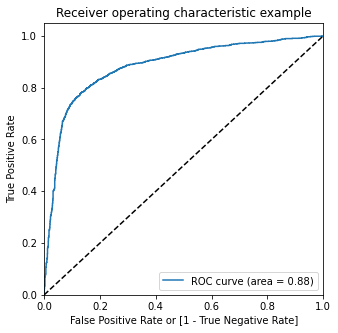

In [87]:
draw_roc(y_train_pred_final.churned, y_train_pred_final.churn_Probability)

In [88]:
# creating 10 points out of which one we will choose for our cutoff point


numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churned,churn_Probability,serial No,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.11,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.21,1,0,1,1,1,0,0,0,0,0,0,0
2,0,0.16,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.16,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.23,4,0,1,1,1,0,0,0,0,0,0,0


In [89]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['churned'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]            # Inserting all the data into the dataframe
print(df_cutoffs)

      Probability  Accuracy  Sensitvity  Specificity
0.00         0.00      0.50        1.00         0.00
0.10         0.10      0.63        0.97         0.29
0.20         0.20      0.70        0.95         0.45
0.30         0.30      0.75        0.91         0.60
0.40         0.40      0.80        0.88         0.72
0.50         0.50      0.82        0.83         0.80
0.60         0.60      0.82        0.77         0.87
0.70         0.70      0.81        0.70         0.92
0.80         0.80      0.71        0.47         0.96
0.90         0.90      0.58        0.17         0.99


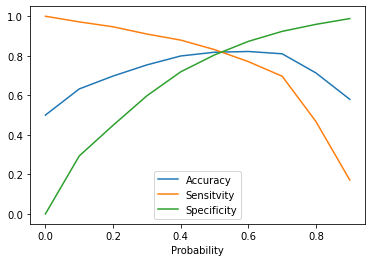

In [90]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

In [91]:
# Based on our analysis above we feel a cutoff of 0.55 would be more ideal. Hence we change the cutoff from 0.5 to 0.55


In [92]:
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Probability.map(lambda x: 1 if x > 0.55 else 0)

y_train_pred_final[['serial No','churn_Probability', 'churned','churn_predicted']].sort_values(by='churn_Probability', ascending=False).head(10)

,serial No,churn_Probability,churned,churn_predicted
1908,1908,1.00,1,1
3564,3564,1.00,1,1
1993,1993,1.00,1,1
2477,2477,1.00,1,1
2431,2431,1.00,1,1
3486,3486,1.00,1,1
3492,3492,1.00,1,1
1932,1932,1.00,1,1
2070,2070,1.00,1,1
2110,2110,1.00,1,1


In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.churn_predicted)
print(confusion)

[[1558  298]
 [ 365 1491]]


In [94]:
print(metrics.accuracy_score(y_train_pred_final.churned, y_train_pred_final.churn_predicted))

0.8213900862068966


In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
TP / float(TP+FN)

# at a cutoff of 0.55 our model sensitivity/recall is 80%

0.8033405172413793

In [97]:
TN / float(TN+FP)

# at a cutoff of 0.55 our model specificity is 84%

0.8394396551724138

In [98]:
print (TP / float(TP+FP))

# at a cutoff of 0.55 our model precision is 83%

0.8334264952487423


In [99]:
## As we observed when we changed the cutoff from 0.50 to 0.55, the accuracy, specificity and precision scores improve
##  but the recall declines slightly
## hence overall we are comfortable with a cutoff score of 0.55.

In [100]:
## now we fit our model on test datasets and will test them for accuracy and other measures

In [101]:
X_resampled_us[cols] = scaler.fit_transform(X_resampled_us[cols])

In [102]:
X_test = X_test[cols]

In [103]:
X_test[cols] = scaler.fit_transform(X_test[cols])

In [104]:
X_test_sm = sm.add_constant(X_test)

In [105]:
y_test_pred = res5.predict(X_test_sm)

In [106]:
pd.options.display.float_format = '{:.2f}'.format


In [107]:
y_test_pred_final = pd.DataFrame({'churned':y_test.values,'churn_Probability':y_test_pred,'serial No':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,churned,churn_Probability,serial No
51633,0,0.58,51633
19278,0,0.54,19278
96826,0,0.55,96826
41773,0,0.63,41773
54528,0,0.31,54528


In [108]:
y_test_pred_final['churn_Predicted']=y_test_pred_final['churn_Probability'].map(lambda x:1 if x >0.55 else 0 )  # Predicted value 

y_test_pred_final.head()

,churned,churn_Probability,serial No,churn_Predicted
51633,0,0.58,51633,1
19278,0,0.54,19278,0
96826,0,0.55,96826,0
41773,0,0.63,41773,1
54528,0,0.31,54528,0


In [109]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.churned, y_test_pred_final.churn_Predicted))  

Accuracy score in predicting test dataset : 0.6878888888888889


In [110]:
confusion_2 = metrics.confusion_matrix(y_test_pred_final.churned, y_test_pred_final.churn_Predicted)
print(confusion_2)

[[5488 2716]
 [  93  703]]


In [111]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [112]:
TP / float(TP+FN)
# at a cutoff of 0.20 our model sensitivity/recall is 88%

0.8831658291457286

In [113]:
TN / float(TN+FP)
# at a cutoff of 0.20 our model specificity is 67%

0.6689419795221843

In [114]:
print(metrics.accuracy_score(y_test_pred_final.churned, y_test_pred_final.churn_Predicted))

0.6878888888888889


In [117]:
## We believe we have created a model which can predict which customers will churn at an impressive recall rate (88% on test dataset)
## we believe below are very important features to be scrutinized for predicting churning of the high value customers
vif['Features']

9       total_rech_amt_8
0                 arpu_7
4         total_og_mou_8
8       total_rech_amt_6
5           loc_ic_mou_8
7       total_rech_num_8
2           offnet_mou_7
3           loc_og_mou_8
6         total_ic_mou_6
10    last_day_rch_amt_8
1            onnet_mou_6
Name: Features, dtype: object

In [116]:
## our analysis of the below table also tells us that :
## - customers who are extensively making calls within the network for June month but then calling a lot to other operators in July are highly likely to churn 
## - customers who are extensively using local incoming, local outgoing and have done recharge for the month of August are least likely to churn

res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3700
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.4
Date:                Mon, 31 May 2021   Deviance:                       3360.7
Time:                        16:26:37   Pearson chi2:                 4.71e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4451      0.113      3.943      0.000       0.224       0.666
arpu_7                12.3974      2.353      5.269      0.000       7.786      17.009
onnet_mou_6            4.5822      0.805      5.693      0.000       3.005       6.160
offnet_mou_7           3.9964      0.810      4.931      0.000       2.408       5.585
loc_og_mou_8         -12.0065      2.066     -5.811      0.000     -16.056      -7.957
total_og_mou_8        -5.1253      0.788     -6.507      0.000      -6.669      -3.581
loc_ic_mou_8         -18.4719      1.786    -10.344      0.000     -21.972     -14.972
total_ic_mou_6         3.0110      0.806      3.733      0.000       1.430       4.592
total_rech_num_8      -9.0586      1.459     -6.210      0.000     -11.917      -6.200
total_rech_amt_6       6.9733      1.456      4.789      0.000       4.119       9.827
total_rech_amt_8      -7.8818      2.260     -3.487      0.000     -12.312      -3.452
last_day_rch_amt_8   -12.5277      2.134     -5.871      0.000     -16.710      -8.345
======================================================================================
"""

**Strategies**

**1)** Our analysis also shows that customers who have been active even a couple of months after the 'happy phase' in either of the following are least likely to churn
- attending incoming calls (**i.e loc_ic_mou_8**)
- making outgoing calls (**i.e loc_og_mou_8**)
- have done a recharge (**i.e last_day_rch_amt_8**) 

Hence the telecom company need not utilise efforts in retaining them and thereby saving costs

**2)** Try to provide more offers to customers who start making calls to other operator mobile numbers (**i.e offfnet_mou_7**) following a month of calling within the same network (**i.e onnet_mou_6**). 

These customers usually churn as when they start calling friends/relatives/colleagues from other networks they start learning from them about the comptetitors' telecom services and get knowledge about their rates, services and if they find them to be better they would churn

**3)** Try to focus on customer services for the high value customers in the happy phase (**i.e arpu_7**). Our analysis shows that high value customers churn a lot a couple of months after the 'happy phase' (i.e 1st and 2nd months of usage)

